<a href="https://colab.research.google.com/github/Tecindes/Challenge_Alura_Data_Science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [340]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()
tienda2.head()
tienda3.head()
tienda4.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782
2,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
3,Modelado predictivo,Libros,57700.0,1300.0,23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25184,-75.56359
4,Auriculares,Electrónicos,138900.0,5600.0,25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175


#1. Análisis de facturación



In [341]:
# prompt: Función para controlar el color que identificara a las tiendas
def definirColor(controlPosicion =0)  :
    if controlPosicion==0:
        color = 'green'
    if controlPosicion==1:
        color = 'orange'
    if controlPosicion==2:
        color = 'purple'
    if controlPosicion==3:
        color = 'red'
    return color

In [342]:
# prompt: Agrega campo Tienda para poder unir los DataFrames
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'


In [345]:
# Unir los DataFrames y crear la columna Año para trabajar la data
tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])


# Convertir la columna 'Fecha' a datetime
tiendas['Fecha de Compra'] = pd.to_datetime(tiendas['Fecha de Compra'])

# Crear una columna con el año
tiendas['Año'] = tiendas['Fecha de Compra'].dt.year

# Total facturado por tienda
totalFacturadoTiendas=tiendas.groupby('Tienda').sum('Precio').sort_values(by='Precio', ascending=False)
print(f'Total facturado por tienda (en millones de S/):\n{(totalFacturadoTiendas.Precio/1000000).map("S/ {:,.2f}".format)}')


Total facturado por tienda (en millones de S/):
Tienda
Tienda 1    S/ 1,150.88
Tienda 2    S/ 1,116.34
Tienda 3    S/ 1,098.02
Tienda 4    S/ 1,038.38
Name: Precio, dtype: object


<ipython-input-345-de4a83013915>:6: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



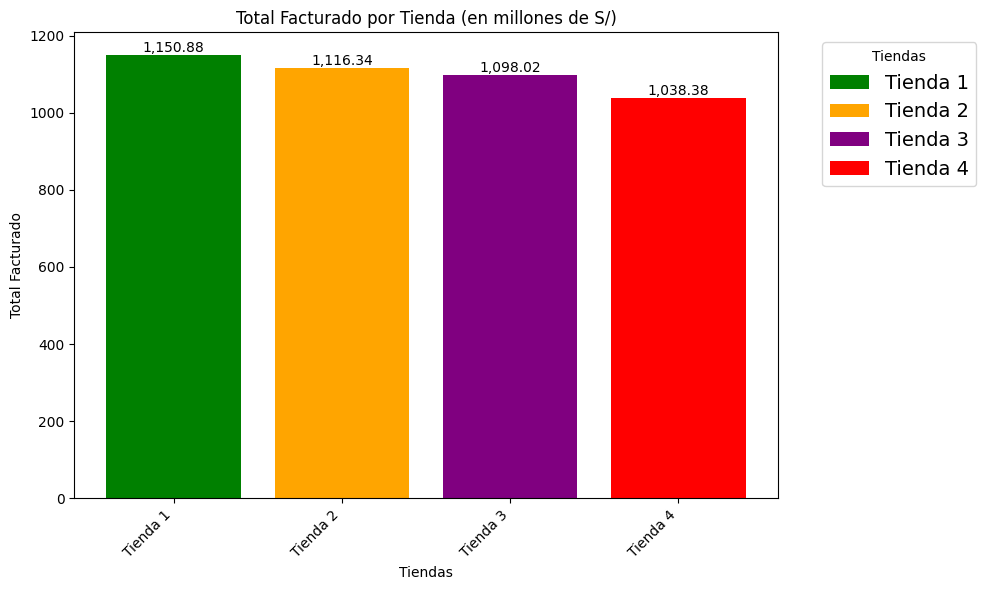

In [346]:
# prompt: crear un grafico tipo barra

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
colors = ['green', 'orange', 'purple','red']
bars=plt.bar(totalFacturadoTiendas.index, (totalFacturadoTiendas['Precio'] / 1000000), color=colors, label=totalFacturadoTiendas.index)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,.2f}", va='bottom', ha='center')

plt.xlabel('Tiendas')
plt.ylabel('Total Facturado')
plt.title('Total Facturado por Tienda (en millones de S/)')
plt.legend(title='Tiendas', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [347]:
# Cantidad de productos vendidos por categoría y tienda
totalCantidadProductosCategoria = tiendas.groupby(['Tienda', 'Categoría del Producto'])['Producto'].count().reset_index().sort_values(by=['Tienda','Producto'], ascending=False)
totalCantidadProductosCategoria = totalCantidadProductosCategoria.rename(columns={'Producto': 'Cantidad Vendida'})
primerosCategoriaTienda = totalCantidadProductosCategoria.groupby('Tienda').head(4).sort_values(by=['Tienda'], ascending=True)
primerosCategoriaTienda['Tienda Categoría'] = primerosCategoriaTienda['Tienda']+ ' - ' +primerosCategoriaTienda['Categoría del Producto']
primerosCategoriaTienda


,Tienda,Categoría del Producto,Cantidad Vendida,Tienda Categoría
7,Tienda 1,Muebles,465,Tienda 1 - Muebles
3,Tienda 1,Electrónicos,448,Tienda 1 - Electrónicos
5,Tienda 1,Juguetes,324,Tienda 1 - Juguetes
2,Tienda 1,Electrodomésticos,312,Tienda 1 - Electrodomésticos
15,Tienda 2,Muebles,442,Tienda 2 - Muebles
11,Tienda 2,Electrónicos,422,Tienda 2 - Electrónicos
13,Tienda 2,Juguetes,313,Tienda 2 - Juguetes
10,Tienda 2,Electrodomésticos,305,Tienda 2 - Electrodomésticos
23,Tienda 3,Muebles,499,Tienda 3 - Muebles
19,Tienda 3,Electrónicos,451,Tienda 3 - Electrónicos


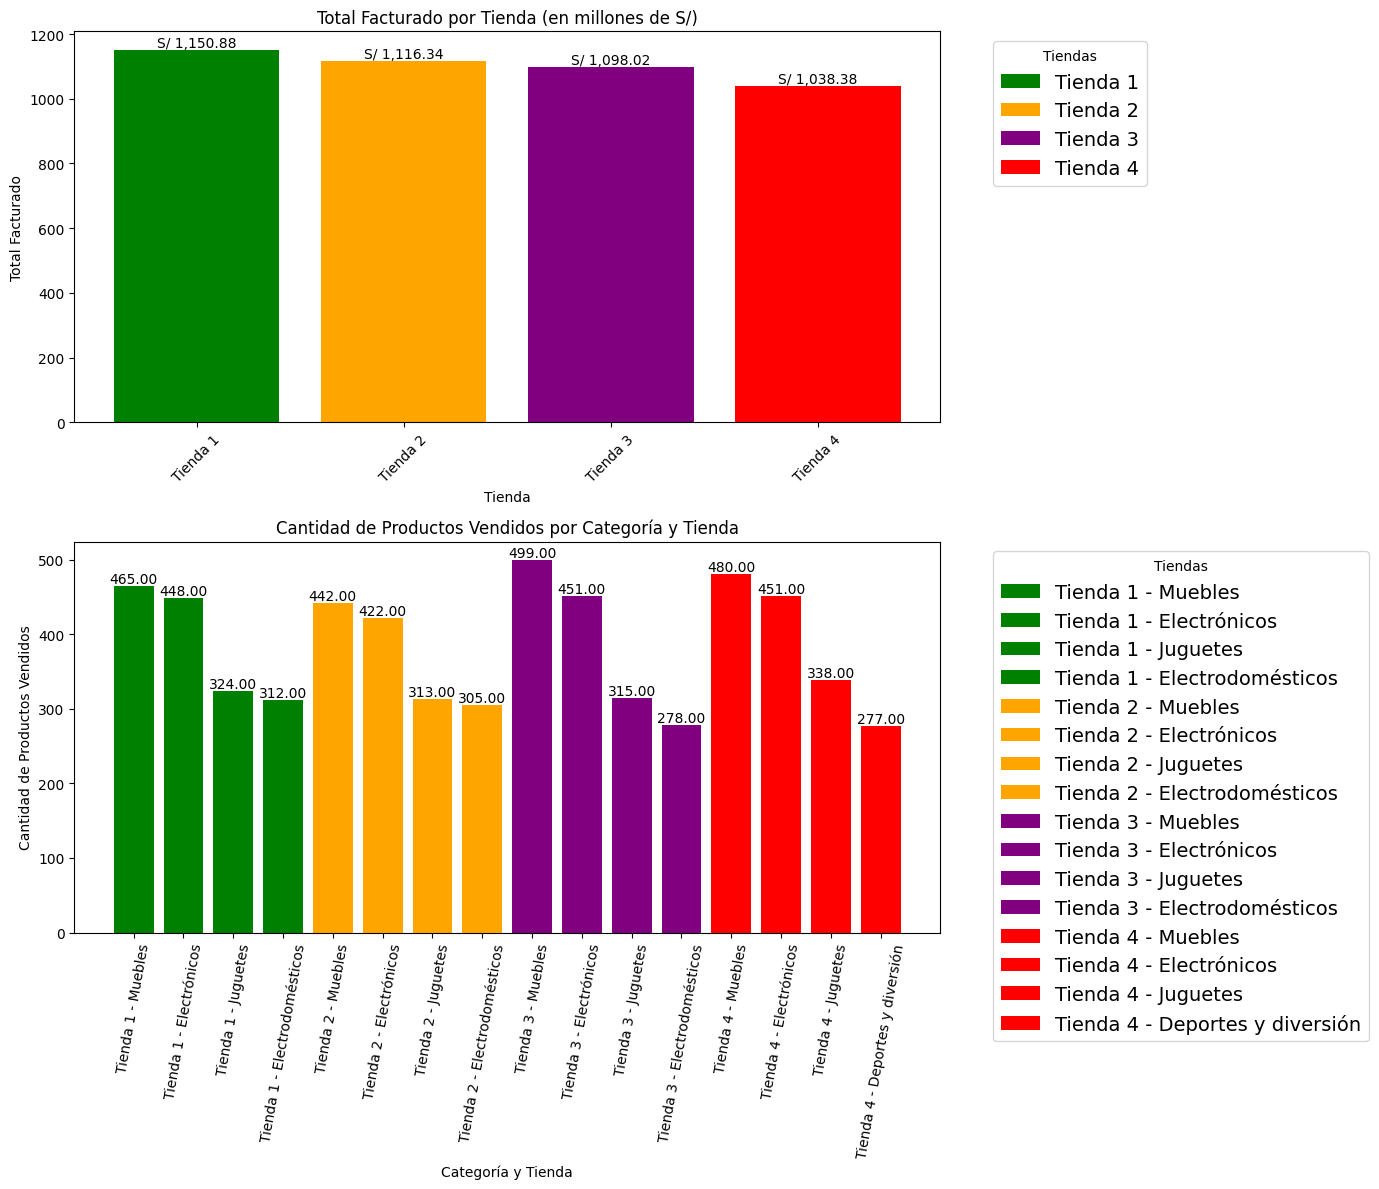

In [348]:
# prompt: crear subplots en grafico de barras con pandas


import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Plot 1: Total facturado por tienda
colors = ['green', 'orange', 'purple','red']
bars = axes[0].bar(totalFacturadoTiendas.index, (totalFacturadoTiendas['Precio'] / 1000000), color=colors,label=totalFacturadoTiendas.index)

for bar in bars:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval, f"S/ {yval:,.2f}", va='bottom', ha='center')

axes[0].set_xlabel('Tienda')
axes[0].set_ylabel('Total Facturado')
axes[0].set_title('Total Facturado por Tienda (en millones de S/)')
axes[0].legend(title='Tiendas', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)

# Plot 2: Cantidad de productos vendidos por categoría y tienda
controlPosicion=-1
for tienda in primerosCategoriaTienda['Tienda'].unique():
    controlPosicion=controlPosicion+1
    colors=definirColor(controlPosicion)
    tienda_data = primerosCategoriaTienda[primerosCategoriaTienda['Tienda'] == tienda]
    bars1 = axes[1].bar(tienda_data['Tienda Categoría'], tienda_data['Cantidad Vendida'], color=colors,label=tienda_data['Tienda Categoría'])
    for bar in bars1:
      yval = bar.get_height()
      axes[1].text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,.2f}", va='bottom', ha='center')

axes[1].set_xlabel('Categoría y Tienda')
axes[1].set_ylabel('Cantidad de Productos Vendidos')
axes[1].set_title('Cantidad de Productos Vendidos por Categoría y Tienda')
axes[1].tick_params(axis='x', rotation=80)
axes[1].legend(title='Tiendas', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=14)

plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [93]:
# Cantidad de productos vendidos por categoría y tienda
calificacionPromedioClientesTienda = tiendas.groupby(['Tienda'])['Calificación'].mean().reset_index().sort_values(by=['Tienda'], ascending=True)
calificacionPromedioClientesTienda = calificacionPromedioClientesTienda.rename(columns={'Calificación': 'Valoración Media'})
calificacionPromedioClientesTienda = calificacionPromedioClientesTienda.sort_values(by=['Tienda'], ascending=True)
calificacionPromedioClientesTienda



,Tienda,Valoración Media
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


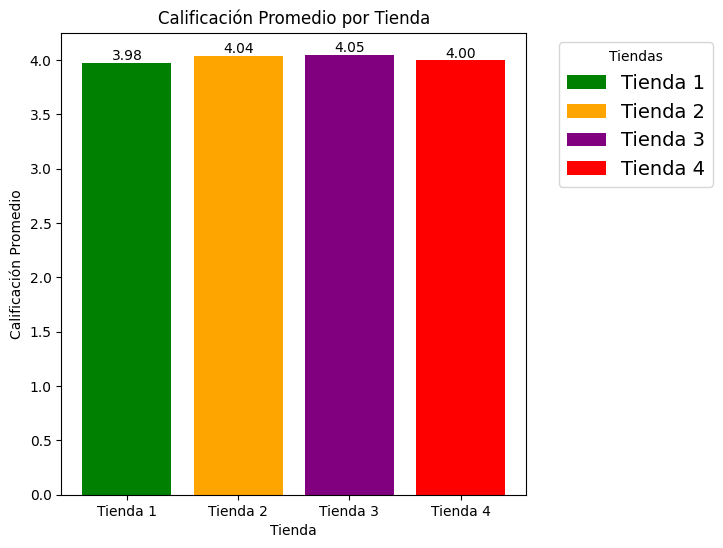

In [349]:
# prompt: crear grafico de barras con pandas
plt.figure(figsize=(6, 6))
colors = ['green', 'orange', 'purple','red']
bars=plt.bar(calificacionPromedioClientesTienda['Tienda'], (calificacionPromedioClientesTienda['Valoración Media']), color=colors,label=calificacionPromedioClientesTienda['Tienda'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,.2f}", va='bottom', ha='center')

plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio por Tienda')
plt.legend(title='Tiendas', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=14)
plt.show()




# 4. Productos más y menos vendidos

In [95]:
# prompt: agrupa los datos por tienda y calcula la cantidad de productos vendidos
productosVendidosTienda = tiendas.groupby(['Tienda', 'Producto'])['Precio'].count().reset_index()
productosVendidosTienda =productosVendidosTienda.rename(columns={'Precio': 'Cantidad Vendida'})
productosVendidosTienda['Tienda Producto'] = productosVendidosTienda['Tienda']+ ' - ' +productosVendidosTienda['Producto']


# agrupa por tienda y los más y menos vendidos
productosVendidosTienda=productosVendidosTienda.sort_values(by=['Tienda','Cantidad Vendida'], ascending=[True,False])
productosMasVendidosTienda=productosVendidosTienda.groupby('Tienda').head(2)

productosVendidosTienda=productosVendidosTienda.sort_values(by=['Tienda','Cantidad Vendida'], ascending=[True,True])
productosMenosVendidosTienda=productosVendidosTienda.groupby('Tienda').head(2)

print(productosMasVendidosTienda)
print(productosMenosVendidosTienda)



       Tienda                   Producto  Cantidad Vendida  \
1    Tienda 1                    Armario                60   
33   Tienda 1                 Microondas                60   
75   Tienda 2  Iniciando en programación                65   
84   Tienda 2                 Microondas                62   
129  Tienda 3              Kit de bancas                57   
113  Tienda 3                  Cama king                56   
163  Tienda 4                   Cama box                62   
168  Tienda 4                 Cubertería                59   

                          Tienda Producto  
1                      Tienda 1 - Armario  
33                  Tienda 1 - Microondas  
75   Tienda 2 - Iniciando en programación  
84                  Tienda 2 - Microondas  
129              Tienda 3 - Kit de bancas  
113                  Tienda 3 - Cama king  
163                   Tienda 4 - Cama box  
168                 Tienda 4 - Cubertería  
       Tienda                   Producto  Can

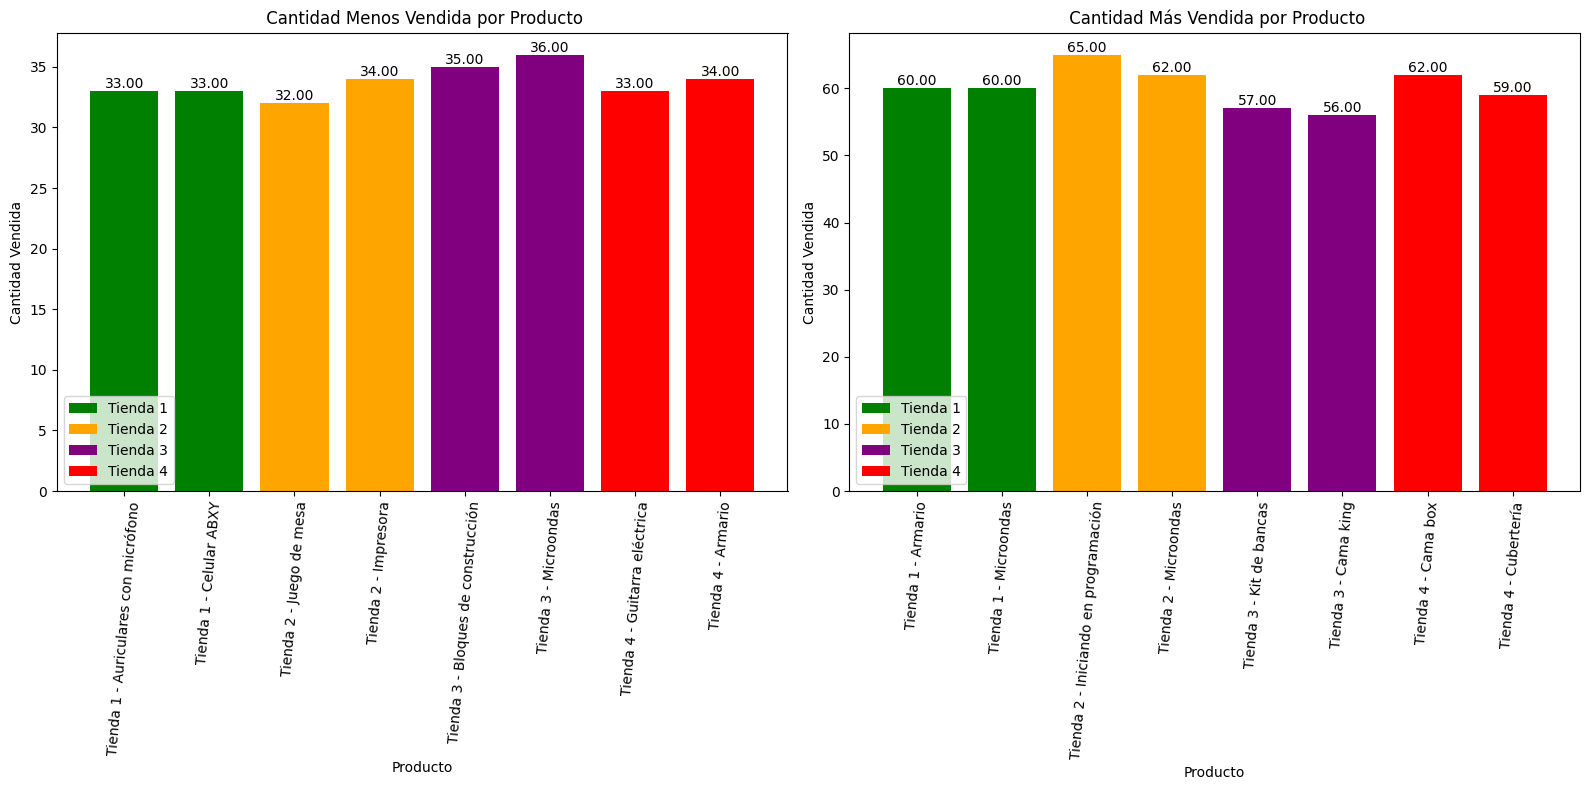

In [350]:
# prompt: crear grafico de barras
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
colors = ['green', 'orange', 'purple','red']

controlPosicion=-1
for tienda in productosMenosVendidosTienda['Tienda'].unique():
    controlPosicion=controlPosicion+1
    colors=definirColor(controlPosicion)
    tienda_data = productosMenosVendidosTienda[productosMenosVendidosTienda['Tienda'] == tienda]
    bars = axes[0].bar(tienda_data['Tienda Producto'], tienda_data['Cantidad Vendida'],color=colors,label=tienda)
    for bar in bars:
      yval = bar.get_height()
      axes[0].text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,.2f}", va='bottom', ha='center')
axes[0].set_xlabel('Producto')
axes[0].set_ylabel('Cantidad Vendida')
axes[0].set_title(' Cantidad Menos Vendida por Producto')
axes[0].tick_params(axis='x', rotation=85)
axes[0].legend()._legend_box.align = "center"

controlPosicion=-1
for tienda in productosMasVendidosTienda['Tienda'].unique():
    controlPosicion=controlPosicion+1
    colors=definirColor(controlPosicion)
    tienda_data = productosMasVendidosTienda[productosMasVendidosTienda['Tienda'] == tienda]
    bars1 = axes[1].bar(tienda_data['Tienda Producto'], tienda_data['Cantidad Vendida'],color=colors, label=tienda)
    for bar in bars1:
      yval = bar.get_height()
      axes[1].text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,.2f}", va='bottom', ha='center')

axes[1].set_xlabel('Producto')
axes[1].set_ylabel('Cantidad Vendida')
axes[1].set_title(' Cantidad Más Vendida por Producto')
axes[1].tick_params(axis='x', rotation=85)
axes[1].legend()._legend_box.align = "center"
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [97]:
# Costo promedio de envío de productos vendidos por tienda
costoPromedioEnvioTienda = tiendas.groupby(['Tienda'])['Costo de envío'].mean().reset_index().sort_values(by=['Tienda'], ascending=True)
costoPromedioEnvioTienda = costoPromedioEnvioTienda.rename(columns={'Costo de envío': 'Envío Promedio'})
costoPromedioEnvioTienda = costoPromedioEnvioTienda.sort_values(by=['Tienda'], ascending=True)
costoPromedioEnvioTienda


,Tienda,Envío Promedio
0,Tienda 1,26018.609580
1,Tienda 2,25216.235693
2,Tienda 3,24805.680373
3,Tienda 4,23459.457167


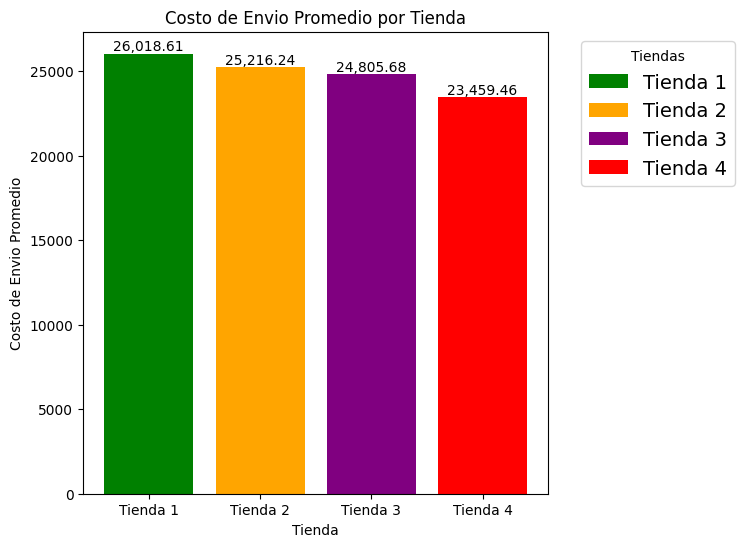

In [98]:
# prompt: crear grafico de barras con pandas
plt.figure(figsize=(6, 6))
colors = ['green', 'orange', 'purple','red']
bars=plt.bar(costoPromedioEnvioTienda['Tienda'], (costoPromedioEnvioTienda['Envío Promedio']), color=colors, label=costoPromedioEnvioTienda['Tienda'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,.2f}", va='bottom', ha='center')

plt.xlabel('Tienda')
plt.ylabel('Costo de Envio Promedio')
plt.title('Costo de Envio Promedio por Tienda')
plt.legend(title='Tiendas', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=14)
plt.show()

#6. Visualización


In [374]:
# prompt: Generar una analisis de costo por tienda con el dataframe tiendas

# Agrupar por tienda y año, y calcular la suma del costo de envío
costo_anual = tiendas.groupby(['Tienda', 'Año'])['Costo de envío'].sum().reset_index()

# Calcular el costo porcentual anual
costo_anual['Costo en %'] = costo_anual.groupby('Tienda')['Costo de envío'].pct_change() * 100

# Imprimir el análisis de crecimiento
print("\nAnálisis de costo anual (En %) por tienda:")
print(costo_anual)

# prompt: Generar una analisis de crecimiento por tienda con el dataframe tiendas


# Agrupar por tienda y año, y calcular la suma del precio
crecimiento_anual = tiendas.groupby(['Tienda', 'Año'])['Precio'].sum().reset_index()

# Calcular el crecimiento porcentual anual
crecimiento_anual['Crecimiento'] = crecimiento_anual.groupby('Tienda')['Precio'].pct_change() * 100

#print(crecimiento_anual['Crecimiento'])
# Imprimir el análisis de crecimiento
print("\nAnálisis de crecimiento anual (En %) por tienda:")
print(crecimiento_anual)


Análisis de costo anual (En %) por tienda:
      Tienda   Año  Costo de envío  Costo en %
0   Tienda 1  2020      19746200.0         NaN
1   Tienda 1  2021      19219700.0   -2.666336
2   Tienda 1  2022      16862300.0  -12.265540
3   Tienda 1  2023       5549700.0  -67.088120
4   Tienda 2  2020      17167500.0         NaN
5   Tienda 2  2021      18618500.0    8.452017
6   Tienda 2  2022      19094700.0    2.557671
7   Tienda 2  2023       4604400.0  -75.886503
8   Tienda 3  2020      17067900.0         NaN
9   Tienda 3  2021      19384800.0   13.574605
10  Tienda 3  2022      18728300.0   -3.386674
11  Tienda 3  2023       3335600.0  -82.189521
12  Tienda 4  2020      17528600.0         NaN
13  Tienda 4  2021      18598200.0    6.102028
14  Tienda 4  2022      16156400.0  -13.129228
15  Tienda 4  2023       3034200.0  -81.219826

Análisis de crecimiento anual (En %) por tienda:
      Tienda   Año       Precio  Crecimiento
0   Tienda 1  2020  368933200.0          NaN
1   Tienda 1  202

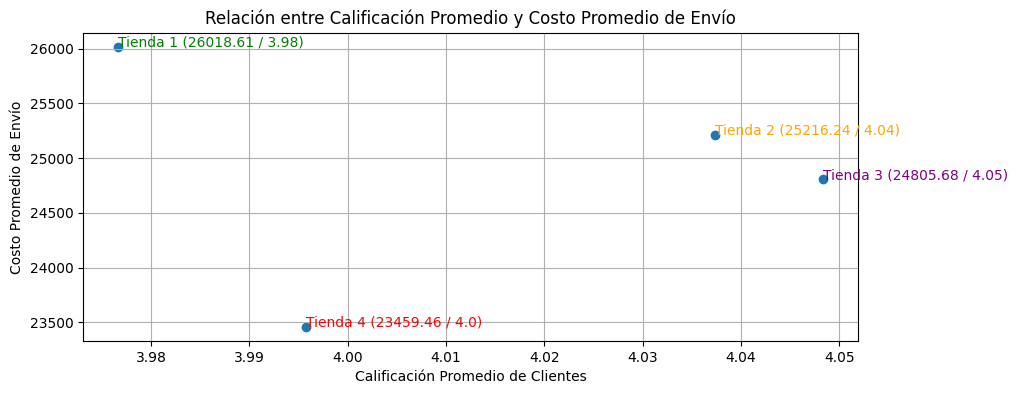

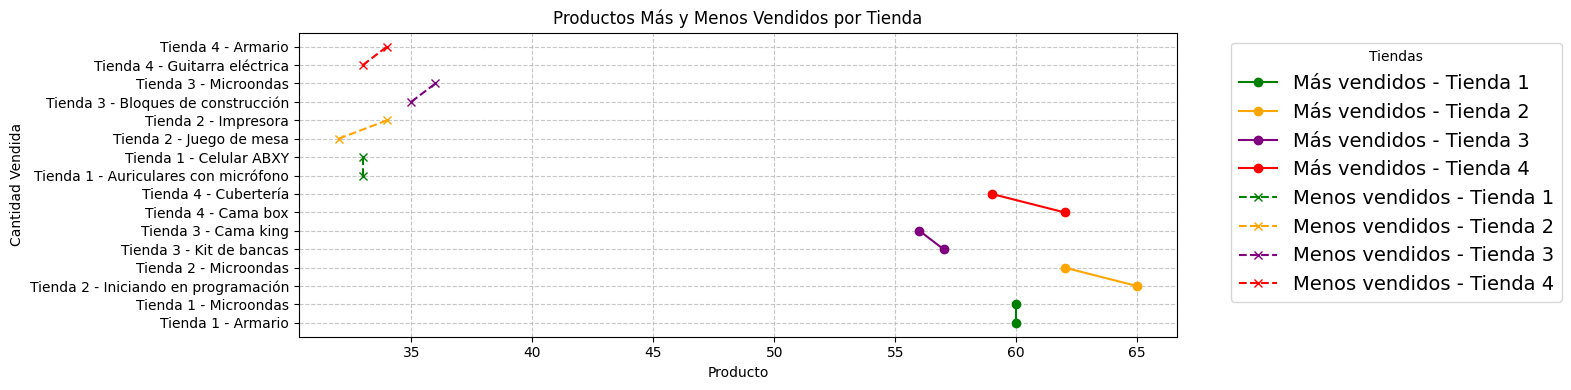

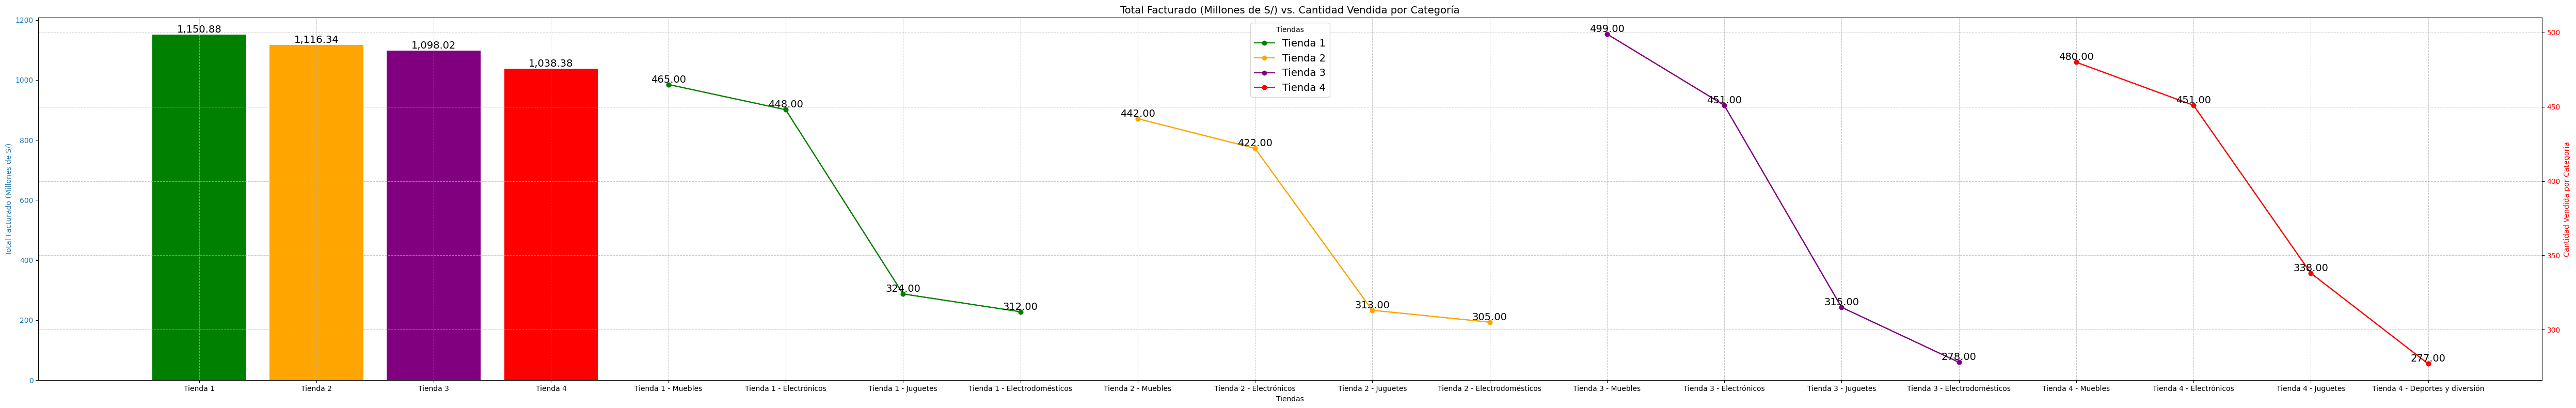

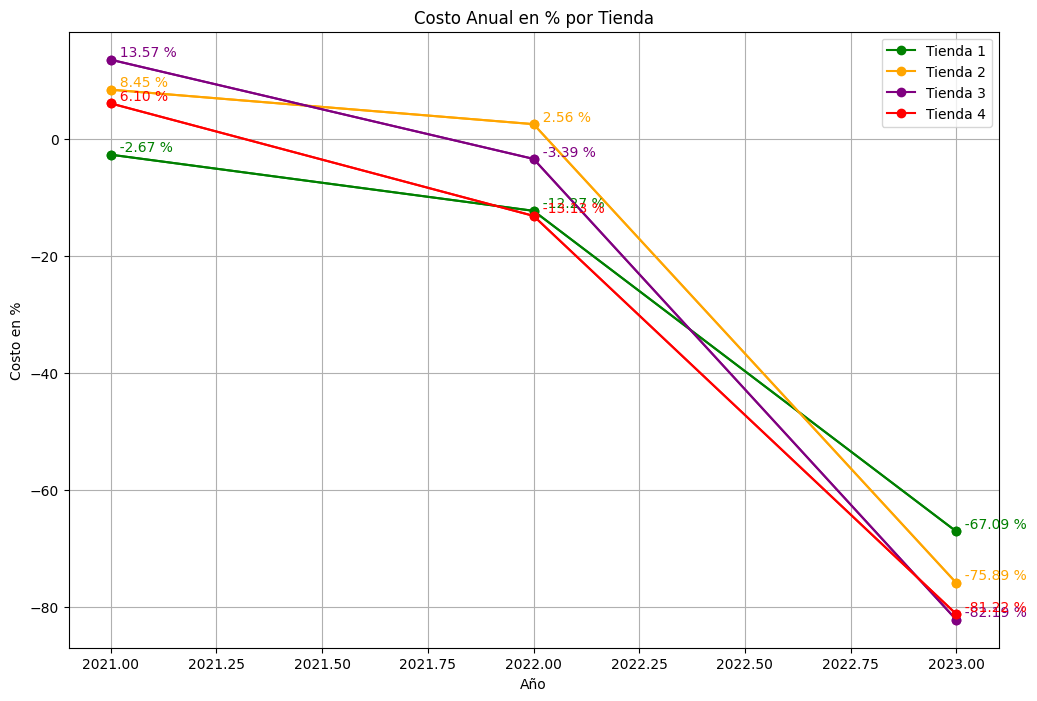

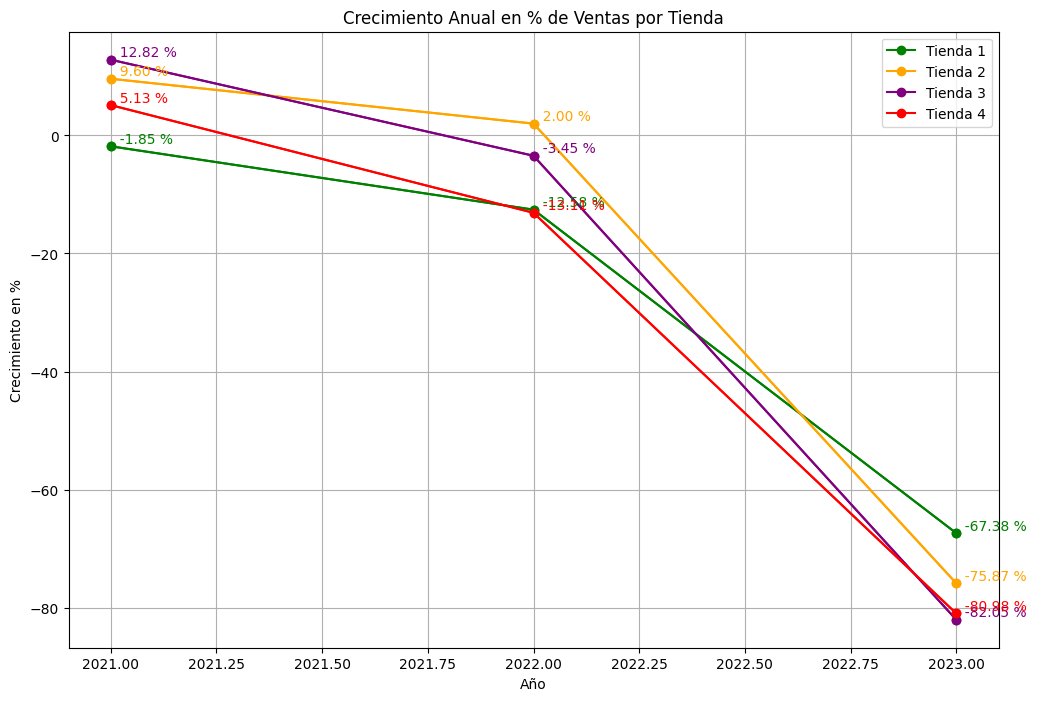

In [375]:
# prompt: Visualización

import matplotlib.pyplot as plt


# prompt: calificacionPromedioClientestienda y CostoPromedioEnvioTienda en un grafico de dispercion mostrando los valores

plt.figure(figsize=(10, 4))
plt.scatter(calificacionPromedioClientesTienda['Valoración Media'], costoPromedioEnvioTienda['Envío Promedio'])
plt.xlabel('Calificación Promedio de Clientes')
plt.ylabel('Costo Promedio de Envío')
plt.title('Relación entre Calificación Promedio y Costo Promedio de Envío')
colors = 'red'
controlPosicion=-1
for i, row in calificacionPromedioClientesTienda.iterrows():
    controlPosicion=controlPosicion+1
    colors=definirColor(controlPosicion)
    plt.annotate(row['Tienda']+' ('+str(round(costoPromedioEnvioTienda.loc[i, 'Envío Promedio'],2))+' / '+str(round(row['Valoración Media'],2))+')', (row['Valoración Media'], costoPromedioEnvioTienda.loc[i, 'Envío Promedio']),color=colors)

plt.grid(True)
plt.show()

# prompt: productosMasVendidosTienda y productosMenosVendidosTienda

fig, ax = plt.subplots(figsize=(16, 4))
controlPosicion=-1
for tienda in productosMasVendidosTienda['Tienda'].unique():
    controlPosicion=controlPosicion+1
    colors=definirColor(controlPosicion)
    tienda_data = productosMasVendidosTienda[productosMasVendidosTienda['Tienda'] == tienda]
    ax.plot(tienda_data['Cantidad Vendida'], tienda_data['Tienda Producto'], marker='o', color=colors, label=f'Más vendidos - {tienda}')

controlPosicion=-1
for tienda in productosMenosVendidosTienda['Tienda'].unique():
    controlPosicion=controlPosicion+1
    colors=definirColor(controlPosicion)
    tienda_data = productosMenosVendidosTienda[productosMenosVendidosTienda['Tienda'] == tienda]
    ax.plot(tienda_data['Cantidad Vendida'], tienda_data['Tienda Producto'], marker='x', linestyle='--', color=colors,label=f'Menos vendidos - {tienda}')

ax.set_xlabel('Producto')
ax.set_ylabel('Cantidad Vendida')
ax.set_title('Productos Más y Menos Vendidos por Tienda')
ax.tick_params(axis='x', rotation=0)
ax.legend(title='Tiendas', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=14)
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# prompt: unir dataframe totalFacturadoTiendas y primerosCategoriaTienda en un grafico

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(50, 8))

# Plot totalFacturadoTiendas
color = 'tab:blue'
colors = ['green', 'orange', 'purple','red']
ax1.set_xlabel('Tiendas')
ax1.set_ylabel('Total Facturado (Millones de S/)', color=color)
ax1.bar(totalFacturadoTiendas.index, totalFacturadoTiendas['Precio'] / 1000000, color=colors)
ax1.tick_params(axis='y', labelcolor=color)
for bar in ax1.bar(totalFacturadoTiendas.index, totalFacturadoTiendas['Precio'] / 1000000, color=colors):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,.2f}", va='bottom', ha='center',fontsize=14)



# Plot primerosCategoriaTienda
ax2 = ax1.twinx()
color = 'red'
ax2.set_ylabel('Cantidad Vendida por Categoría', color=color)

colorLabel = 'black'
controlPosicion=-1
for tienda in primerosCategoriaTienda['Tienda'].unique():
    controlPosicion=controlPosicion+1
    color=definirColor(controlPosicion)
    tienda_data = primerosCategoriaTienda[primerosCategoriaTienda['Tienda'] == tienda]
    ax2.plot(tienda_data['Tienda Categoría'], tienda_data['Cantidad Vendida'], marker='o', linestyle='-', color=color, label=tienda)

    for bar in ax2.plot(tienda_data['Tienda Categoría'], tienda_data['Cantidad Vendida'], marker='o', linestyle='-', color=color):
      yval = tienda_data['Cantidad Vendida'].iloc[-1]
      ax2.text(tienda_data['Tienda Categoría'].iloc[-1], yval, f"{yval:,.2f}", va='bottom', ha='center', color=colorLabel,fontsize=14)

      yval = tienda_data['Cantidad Vendida'].iloc[-2]
      ax2.text(tienda_data['Tienda Categoría'].iloc[-2], yval, f"{yval:,.2f}", va='bottom', ha='center', color=colorLabel,fontsize=14)

      yval = tienda_data['Cantidad Vendida'].iloc[-3]
      ax2.text(tienda_data['Tienda Categoría'].iloc[-3], yval, f"{yval:,.2f}", va='bottom', ha='center', color=colorLabel,fontsize=14)

      yval = tienda_data['Cantidad Vendida'].iloc[-4]
      ax2.text(tienda_data['Tienda Categoría'].iloc[-4], yval, f"{yval:,.2f}", va='bottom', ha='center', color=colorLabel,fontsize=14)

ax1.grid(axis='x', linestyle='--', alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(title='Tiendas', loc='upper center',fontsize=14 )
plt.xticks(rotation=90, ha='right',fontsize=14)
plt.title('Total Facturado (Millones de S/) vs. Cantidad Vendida por Categoría',fontsize=14 )
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# prompt: genera un grafico de lineas con el dataframe costo_anual
import matplotlib.pyplot as plt

color = 'green'
controlPosicion=-1
plt.figure(figsize=(12, 8))
for tienda in costo_anual['Tienda'].unique():
    controlPosicion=controlPosicion+1
    color=definirColor(controlPosicion)
    tienda_data = costo_anual[costo_anual['Tienda'] == tienda]
    plt.plot(tienda_data['Año'], tienda_data['Costo en %'], marker='o', linestyle='-',color=color,label=tienda)
    numeroRegistros=len(tienda_data)

    for bar in plt.plot(tienda_data['Año'], tienda_data['Costo en %'], marker='o', linestyle='-',color=color):
      for i in range(numeroRegistros):
        yval = tienda_data['Costo en %'].iloc[((i+1)*-1)]
        plt.text(tienda_data['Año'].iloc[((i+1)*-1)], yval, f"  {yval:,.2f} %", va='bottom', ha='left', color=color,fontsize=10)
plt.xlabel('Año')
plt.ylabel('Costo en %')
plt.title('Costo Anual en % por Tienda')
plt.legend()
plt.grid(True)
plt.show()

# prompt: genera un grafico de lineas con el dataframe crecimiento_anual

import matplotlib.pyplot as plt

color = 'green'
controlPosicion=-1
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
for tienda in crecimiento_anual['Tienda'].unique():
    controlPosicion=controlPosicion+1
    color=definirColor(controlPosicion)
    tienda_data = crecimiento_anual[crecimiento_anual['Tienda'] == tienda]
    plt.plot(tienda_data['Año'], tienda_data['Crecimiento'], marker='o', linestyle='-',color=color,label=tienda)
    numeroRegistros=len(tienda_data)

    for bar in plt.plot(tienda_data['Año'], tienda_data['Crecimiento'], marker='o', linestyle='-',color=color):
      for i in range(numeroRegistros):
        yval = tienda_data['Crecimiento'].iloc[((i+1)*-1)]
        plt.text(tienda_data['Año'].iloc[((i+1)*-1)], yval, f"  {yval:,.2f} %", va='bottom', ha='left', color=color,fontsize=10)
plt.xlabel('Año')
plt.ylabel('Crecimiento en %')
plt.title('Crecimiento Anual en % de Ventas por Tienda')
plt.legend()
plt.grid(True)
plt.show()


# Extra

In [378]:
# prompt: agrupa por lat, lon, Tienda el dataframe tienda totaliza precio y muestrame los 4 primeros de cada tienda

# Group by 'lat', 'lon', and 'Tienda', sum 'Precio', and get the top 2 for each store
top_products = tiendas.groupby(['lat', 'lon', 'Tienda'])['Precio'].count().reset_index()
top_products = top_products.sort_values(by='Precio', ascending=False)
top_products = top_products.pivot(index='lat', columns=['lon','Tienda'], values=['Precio'])
top_products = top_products.rename(columns={'Precio': 'Cantidad Ventas'})
top_products


Cantidad Ventas                                                \
lon             -74.08175                            -75.56359            
Tienda           Tienda 4 Tienda 2 Tienda 1 Tienda 3  Tienda 2 Tienda 3   
lat                                                                       
-4.21528              NaN      NaN      NaN      NaN       NaN      NaN   
 1.21361              NaN      NaN      NaN      NaN       NaN      NaN   
 2.92730              NaN      NaN      NaN      NaN       NaN      NaN   
 3.43722              NaN      NaN      NaN      NaN       NaN      NaN   
 3.86530              NaN      NaN      NaN      NaN       NaN      NaN   
 4.14200              NaN      NaN      NaN      NaN       NaN      NaN   
 4.53389              NaN      NaN      NaN      NaN       NaN      NaN   
 4.57937              NaN      NaN      NaN      NaN       NaN      NaN   
 4.60971            991.0    985.0    984.0    983.0       NaN      NaN   
 4.81333              NaN      NaN      NaN      NaN       NaN      NaN   
 5.06889              NaN      NaN      NaN      NaN       NaN      NaN   
 6.25184              NaN      NaN      NaN      NaN     594.0    580.0   
 7.12539              NaN      NaN      NaN      NaN       NaN      NaN   
 7.89391              NaN      NaN      NaN      NaN       NaN      NaN   
 10.39972             NaN      NaN      NaN      NaN       NaN      NaN   
 10.46314             NaN      NaN      NaN      NaN       NaN      NaN   
 10.96854             NaN      NaN      NaN      NaN       NaN      NaN   
 11.24079             NaN      NaN      NaN      NaN       NaN      NaN   
 11.54444             NaN      NaN      NaN      NaN       NaN      NaN   

                                                ...                      \
lon                         -76.52250           ... -67.92390 -74.21682   
Tienda    Tienda 4 Tienda 1  Tienda 1 Tienda 4  ...  Tienda 3  Tienda 2   
lat                                             ...                       
-4.21528       NaN      NaN       NaN      NaN  ...       NaN       NaN   
 1.21361       NaN      NaN       NaN      NaN  ...       NaN       NaN   
 2.92730       NaN      NaN       NaN      NaN  ...       NaN       NaN   
 3.43722       NaN      NaN     283.0    254.0  ...       NaN       NaN   
 3.86530       NaN      NaN       NaN      NaN  ...       4.0       NaN   
 4.14200       NaN      NaN       NaN      NaN  ...       NaN       NaN   
 4.53389       NaN      NaN       NaN      NaN  ...       NaN       NaN   
 4.57937       NaN      NaN       NaN      NaN  ...       NaN       4.0   
 4.60971       NaN      NaN       NaN      NaN  ...       NaN       NaN   
 4.81333       NaN      NaN       NaN      NaN  ...       NaN       NaN   
 5.06889       NaN      NaN       NaN      NaN  ...       NaN       NaN   
 6.25184     577.0    563.0       NaN      NaN  ...       NaN       NaN   
 7.12539       NaN      NaN       NaN      NaN  ...       NaN       NaN   
 7.89391       NaN      NaN       NaN      NaN  ...       NaN       NaN   
 10.39972      NaN      NaN       NaN      NaN  ...       NaN       NaN   
 10.46314      NaN      NaN       NaN      NaN  ...       NaN       NaN   
 10.96854      NaN      NaN       NaN      NaN  ...       NaN       NaN   
 11.24079      NaN      NaN       NaN      NaN  ...       NaN       NaN   
 11.54444      NaN      NaN       NaN      NaN  ...       NaN       NaN   

                                                                      \
lon       -73.25322          -74.21682 -67.92390 -73.25322 -75.68111   
Tienda     Tienda 2 Tienda 4  Tienda 4  Tienda 4  Tienda 1  Tienda 4   
lat                                                                    
-4.21528        NaN      NaN       NaN       NaN       NaN       NaN   
 1.21361        NaN      NaN       NaN       NaN       NaN       NaN   
 2.92730        NaN      NaN       NaN       NaN       NaN       NaN   
 3.43722        NaN      NaN       NaN       NaN      

<ipython-input-381-ce8579a6720f>:9: FutureWarning:

The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.



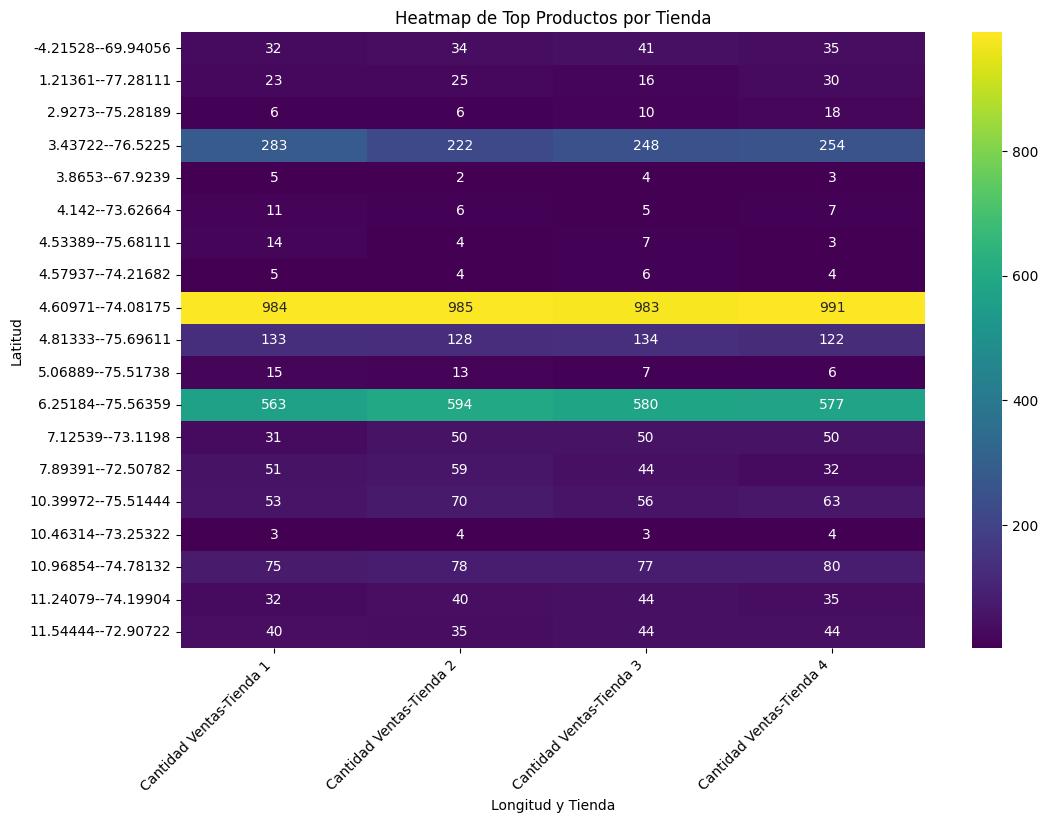

In [381]:
# prompt: genera graficos de calor con el dataframe top_products agrupados por tienda y muestra el valor de cada etiqueta

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'top_products' DataFrame is already created as in the provided code.

# Reshape the DataFrame for the heatmap
top_products_reshaped = top_products.stack(level=[1,2]).unstack()


plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(top_products_reshaped, annot=True, fmt=".0f", cmap="viridis") # annot=True displays values
plt.title('Heatmap de Top Productos por Tienda')
plt.xlabel('Longitud y Tienda')
plt.ylabel('Latitud')
plt.xticks(rotation=45, ha='right')
plt.show()


# Informe Final

# Del análisis realizado se concluye:
- Las tiendas presentan un crecimiento en ventas desde el inicio de actividades en negativo:

  - Tienda 3 con - 82%

  - Tienda 4 con - 80%

  - Tienda 2 con - 75%

  - Tienda 1 con - 67%

- Las categorias de productos más y menos vendidas indican:

  - La categoría muebles es la más vendida en todas las Tiendas.

  - La categoría electrodomesticos es la menos vendida  en las Tiendas 1, 2 y 3.

  - La categoría deportes y diversión es la menos vendida en la Tienda 4.

- La calificación promedio del  cliente comparado contra el costo promedio, agrupado por tiendas arroja:

  - Tienda 1 tiene un costo de 26 mil y 3.98 de satisfacción.

  - Tienda 2 tiene un costo de 25 mil y 4.04 de satisfacción.

  - Tienda 3 tiene un costo de 24 mil y 4.05 de satisfacción.

  - Tienda 4 tiene un costo de 23 mil y 4.00 de satisfacción.

- Del analisis de los productos más y menos vendidos se deduce:

  - La Tienda 2, tiene la mayor cantidad de productos vendidos con el  producto: “Iniciando en programación”

  - La Tienda 2, tiene la menor cantidad de productos vendidos con el producto: “Juego de mesa”

- Si bien sus costos han disminuido eso se debe a la reducción de sus ventas, ya que su coste solo considera el traslado del producto vendido.

  - Tienda 3 con -82%

  - Tienda 4 con -81%

  - Tienda 2 con -75%

  - Tienda 1 con -67%

# Por lo que se considera a la “Tienda 1” como candidata para la venta por lo siguiente:
- Presenta la menor reducción de sus costos de envío, colocándose como la tienda con el mayor costo de envío y la menor aprobación del cliente.

- Si bien es la que presenta las mayores ventas también es la única que presenta disminución (perdidas) en sus ventas desde el inicio de actividades.

- Es la tienda que vende productos en la mayoría de categorías; Pero no es la única con esa característica.

- No presenta los productos más vendidos y esta a la par con otras tiendas en los productos menos vendidos.